# Домашнее задание "Деревья решений"

## Импорты

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

## 1. Получение и загрузка данных

In [2]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
df.shape

(20640, 9)

## 2. Первичный анализ

### 2.1 Проверка данных на пропуски

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**Вывод**: пропущенные значения отсутвтвуют

### 2.2 Проветка данных на выборосы

In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


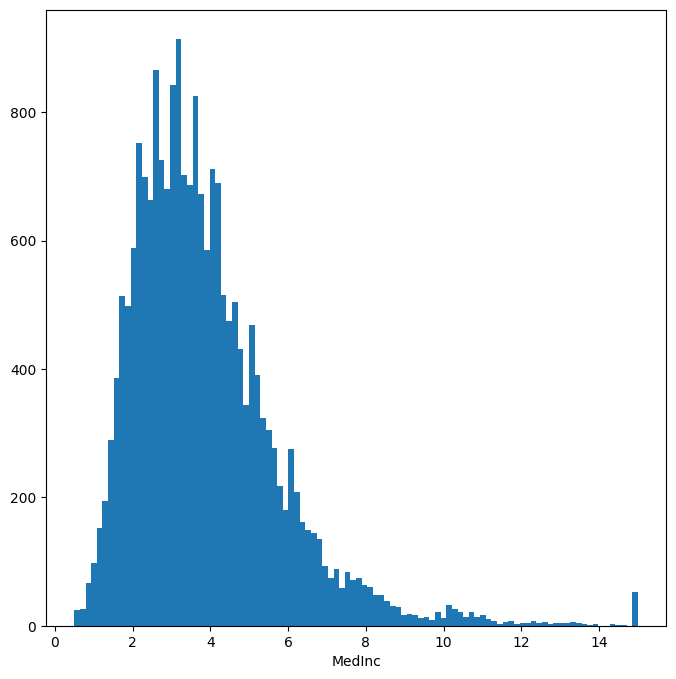

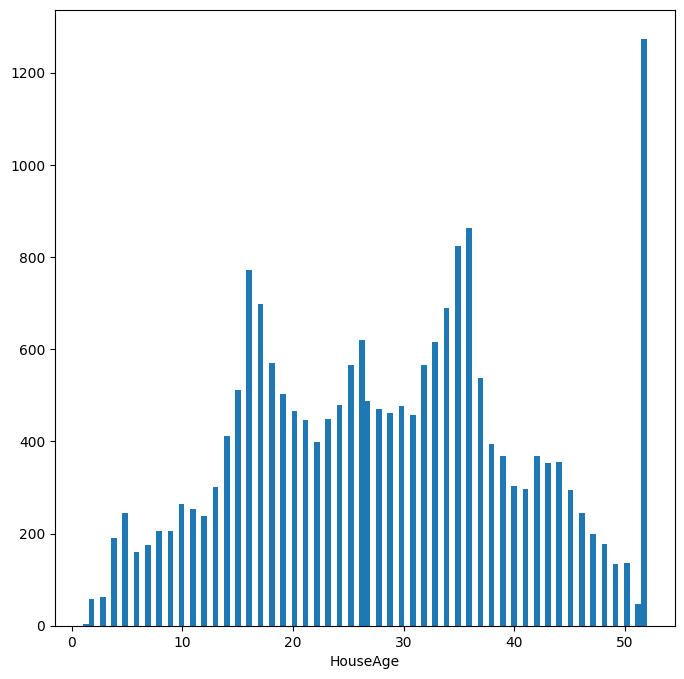

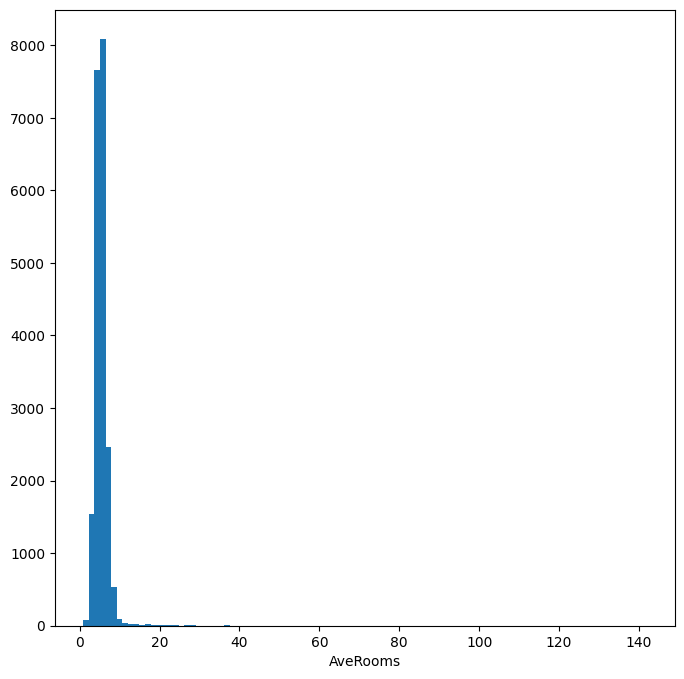

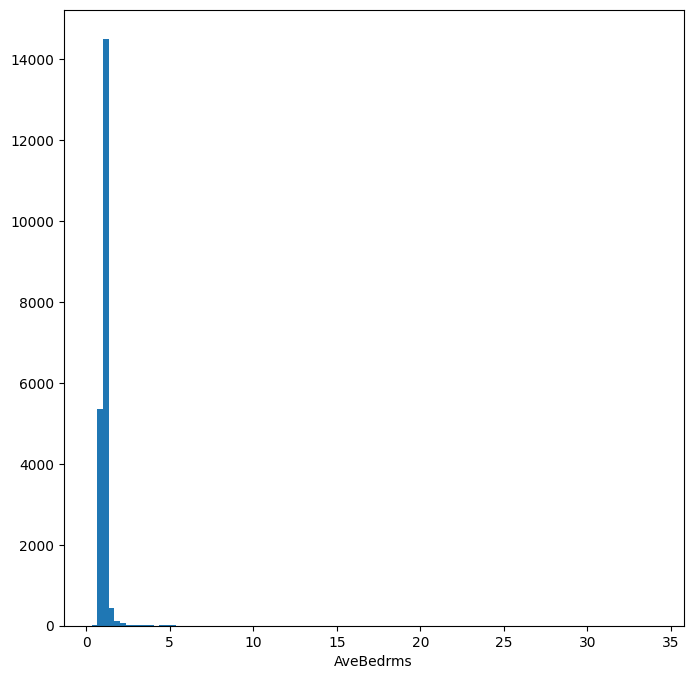

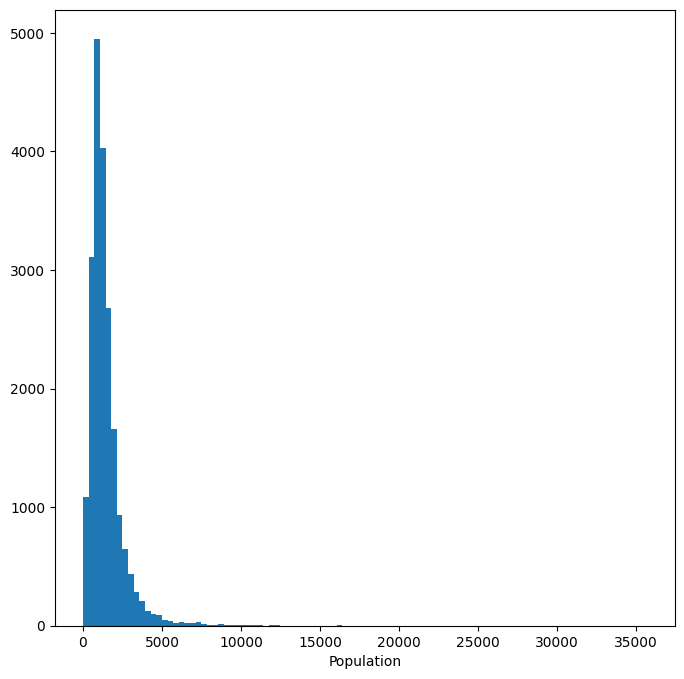

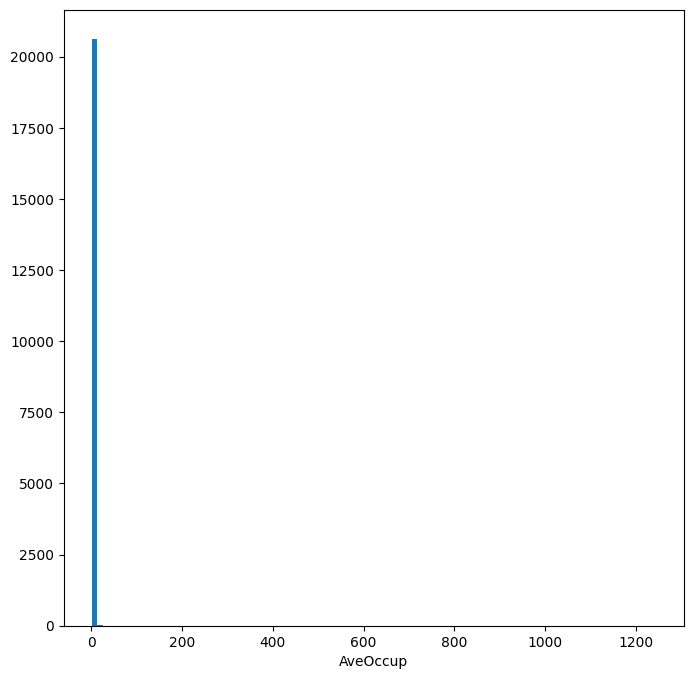

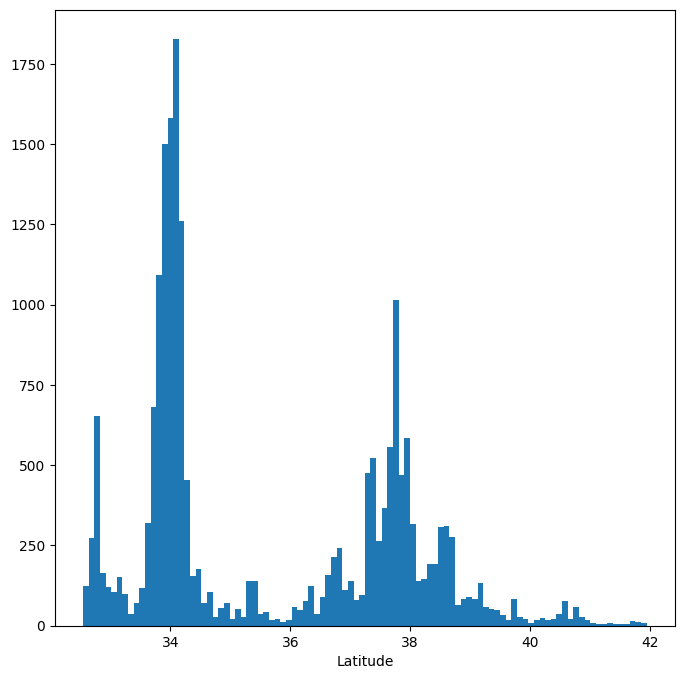

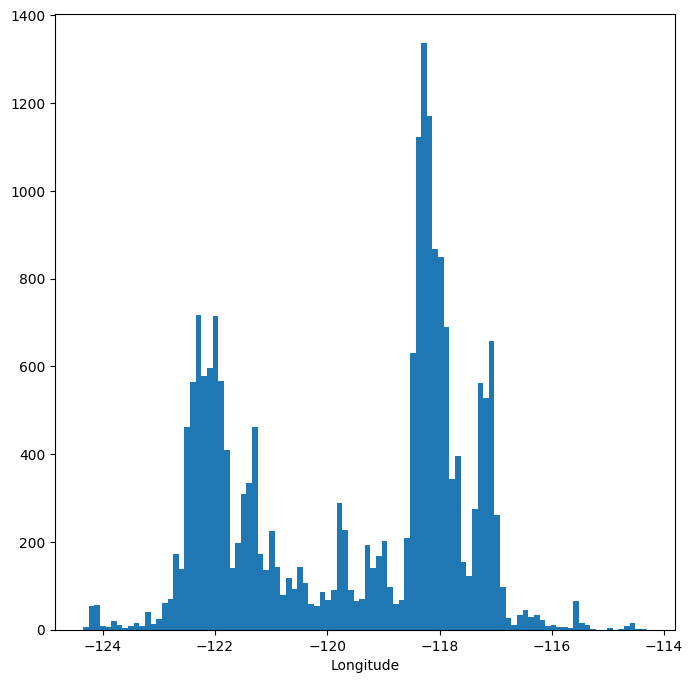

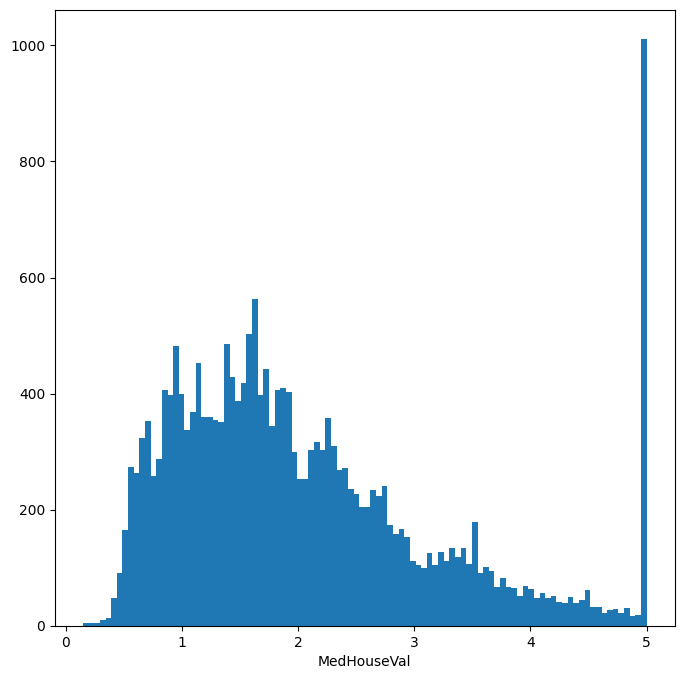

In [15]:
for i in df.columns:
    f, ax = plt.subplots(figsize=(8, 8))
    plt.hist(df[i], bins=100)
    plt.xlabel(i)
    plt.show()

**Вывод**: выбросы присутствуют в следующих признаках: 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'

### 2.3 Удаление выбросов

In [16]:
outliers_col = ['AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [17]:
def drop_outliers(df, col):
    df = df.copy()
    for i in col:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
    return df

In [18]:
new_df = drop_outliers(df, outliers_col)

In [20]:
new_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,17309.000000,17309.000000,17309.000000,17309.000000,17309.000000,17309.000000,17309.000000,17309.000000,17309.000000
mean,3.892385,29.611763,5.236437,1.046541,1265.697152,2.842789,35.646076,-119.630007,2.100561
std,1.798781,12.293384,1.112335,0.065799,631.287475,0.623053,2.124634,1.993392,1.146615
min,0.536000,1.000000,2.032738,0.868687,5.000000,1.169329,32.540000,-124.350000,0.149990
25%,2.612500,19.000000,4.459829,1.002347,806.000000,2.421277,33.940000,-121.840000,1.229000
50%,3.593800,30.000000,5.190852,1.043210,1152.000000,2.795775,34.270000,-118.550000,1.851000
75%,4.797300,38.000000,5.950000,1.088091,1624.000000,3.219739,37.720000,-118.040000,2.688000
max,15.000100,52.000000,8.467890,1.232332,3176.000000,4.540936,41.950000,-114.570000,5.000010


### 2.4 Нормализуем признак 'Population'

In [33]:
scaler = StandardScaler()
new_df['Population'] = scaler.fit_transform(new_df[['Population']])

In [34]:
new_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,17309.000000,17309.000000,17309.000000,17309.000000,1.730900e+04,17309.000000,17309.000000,17309.000000,17309.000000
mean,3.892385,29.611763,5.236437,1.046541,1.592759e-16,2.842789,35.646076,-119.630007,2.100561
std,1.798781,12.293384,1.112335,0.065799,1.000029e+00,0.623053,2.124634,1.993392,1.146615
min,0.536000,1.000000,2.032738,0.868687,-1.997083e+00,1.169329,32.540000,-124.350000,0.149990
25%,2.612500,19.000000,4.459829,1.002347,-7.282109e-01,2.421277,33.940000,-121.840000,1.229000
50%,3.593800,30.000000,5.190852,1.043210,-1.801088e-01,2.795775,34.270000,-118.550000,1.851000
75%,4.797300,38.000000,5.950000,1.088091,5.675912e-01,3.219739,37.720000,-118.040000,2.688000
max,15.000100,52.000000,8.467890,1.232332,3.026130e+00,4.540936,41.950000,-114.570000,5.000010


## 3. Разделение выборки на обучающее и тестовое подмножества

In [35]:
X = new_df[new_df.columns[:-1]]
y = new_df['MedHouseVal']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [37]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13847, 8), (13847,), (3462, 8), (3462,))

## 4. Обучение модели регрессии

In [38]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

## 5. Предсказание целевой переменной и оценка качества модели

In [43]:
lr_train_predict = lr_model.predict(X_train)
lr_test_predict = lr_model.predict(X_test)

In [54]:
r2_train = lr_model.score(X_train, y_train)
r2_test = lr_model.score(X_test, y_test)
pd.DataFrame({'train': r2_train, 'test': r2_test}, index=['r2'])

,train,test
r2,0.680811,0.681398


**Вывод**: Точность предсказания модили линейной регрессии оказалась даже выше на тестовой выборке, чем на обучающей. Признков переобучения нет.

## 6. Обучение дерева решений

In [56]:
tree_model = DecisionTreeRegressor(random_state=1)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

### 6.1 Оценка качества модели

In [58]:
tree_train_predict = tree_model.predict(X_train)
tree_test_predict = tree_model.predict(X_test)

In [74]:
r2_train = tree_model.score(X_train, y_train)
r2_test = tree_model.score(X_test, y_test)
r2_df = pd.DataFrame({'train': r2_train, 'test': r2_test}, index=['r2'])
r2_df

,train,test
r2,1.0,0.607043


**Вывод**: имеются признкаи переобучения модели. При идеальном значении коэффициента детерминации на обучающей выборке низкое его значение на тестовой выборке.

### 6.2 Визуализация дерева решений

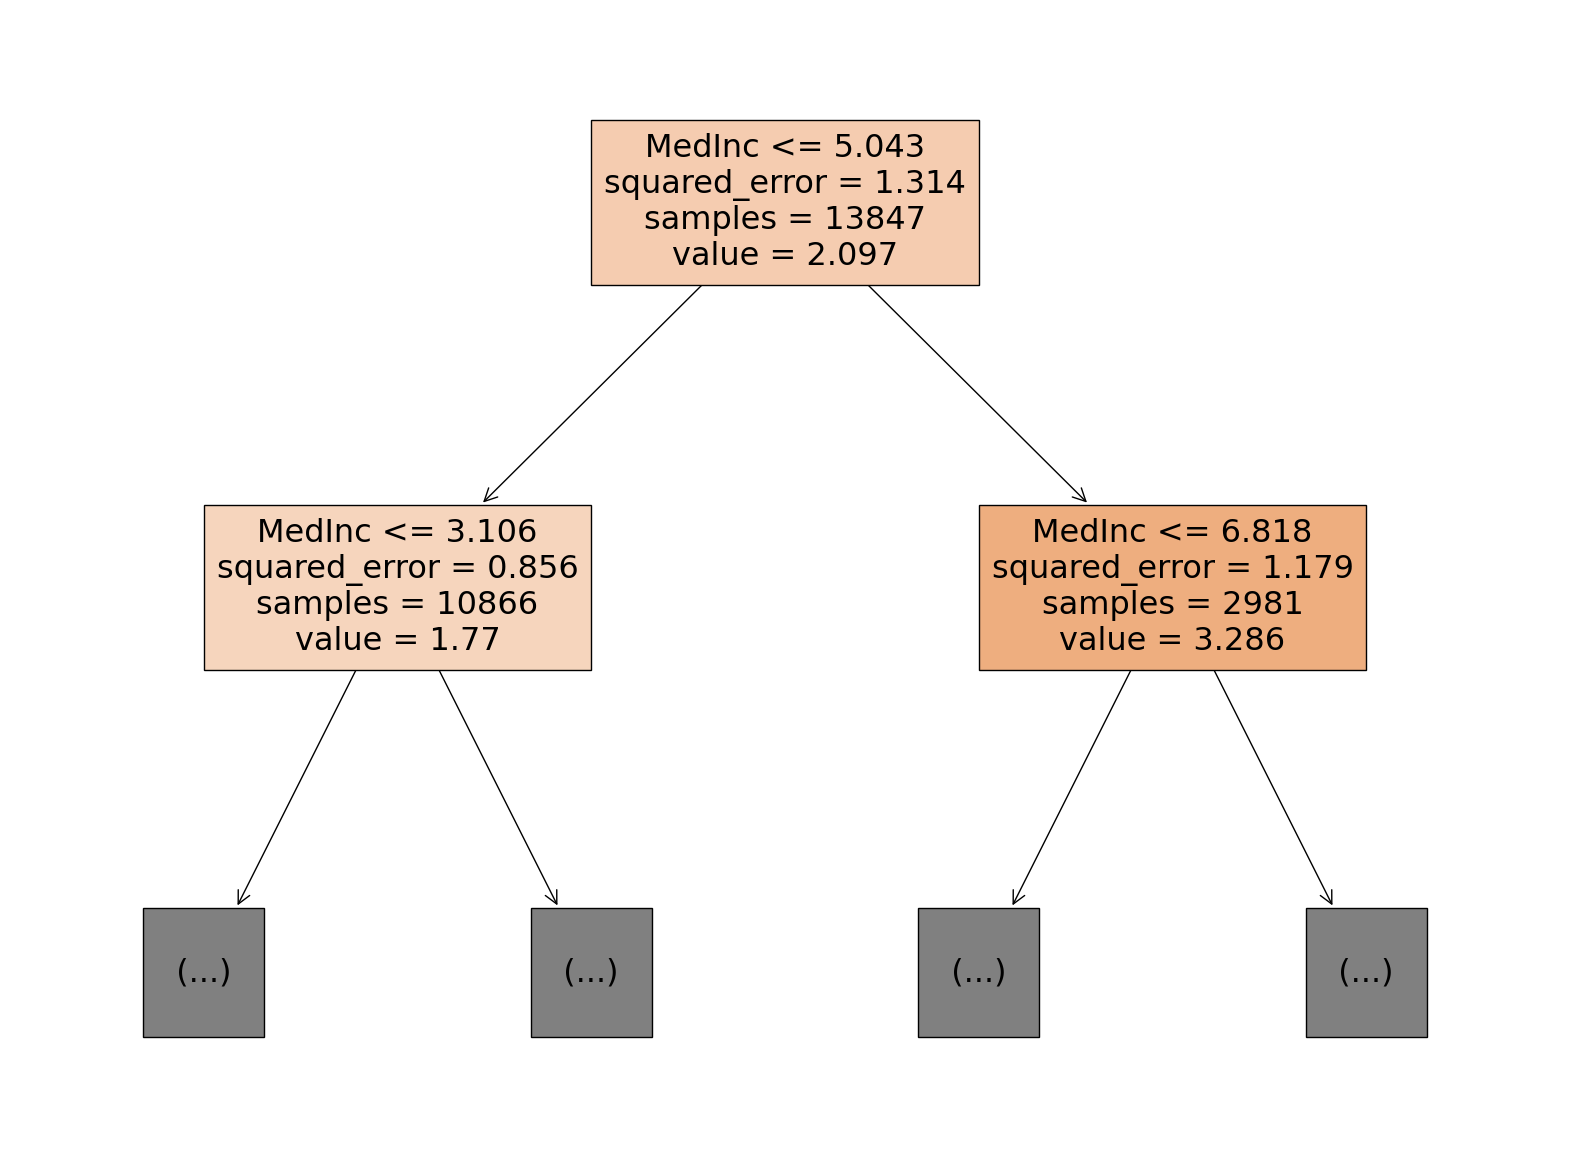

In [71]:
plt.figure(figsize=(20, 15))
plot_tree(tree_model, feature_names=X_train.columns, filled=True, max_depth=1)
plt.show()

## 7. Оптимизация параметров дерева решений

### 7.1 max_deph

А какая глубина дерева у полученной модели?

In [73]:
tree_model.get_depth()

32

In [78]:
df_i = r2_df
for i in range(2, 30):
    tree = DecisionTreeRegressor(random_state=1, max_depth=i)
    tree.fit(X_train, y_train)
    train = tree.score(X_train, y_train)
    test = tree.score(X_test, y_test)
    df_i = pd.concat([df_i, pd.DataFrame({'train': train, 'test': test}, index=[f"max_depth = {i}"])])
df_i

,train,test
r2,1.000000,0.607043
max_depth = 2,0.438076,0.444167
max_depth = 3,0.532031,0.518132
max_depth = 4,0.586419,0.568222
max_depth = 5,0.643631,0.618729
max_depth = 6,0.687614,0.651207
max_depth = 7,0.726281,0.675292
max_depth = 8,0.772814,0.694173
max_depth = 9,0.811983,0.701052
max_depth = 10,0.847139,0.695034


**Вывод**: Наиболее приемлемые значения коэффициента детерминации в обучающей и тестовой выборках при значении параметра клубины дерева равном 9.

### 7.2 min_samples_leaf

In [81]:
df_i = r2_df
for i in range(2, 30):
    tree = DecisionTreeRegressor(random_state=1, min_samples_leaf=i)
    tree.fit(X_train, y_train)
    train = tree.score(X_train, y_train)
    test = tree.score(X_test, y_test)
    df_i = pd.concat([df_i, pd.DataFrame({'train': train, 'test': test}, index=[f"min_sample_leaf = {i}"])])
df_i

,train,test
r2,1.000000,0.607043
min_sample_leaf = 2,0.977775,0.639677
min_sample_leaf = 3,0.954677,0.667184
min_sample_leaf = 4,0.933796,0.693194
min_sample_leaf = 5,0.918000,0.705961
min_sample_leaf = 6,0.904156,0.717925
min_sample_leaf = 7,0.892014,0.723098
min_sample_leaf = 8,0.883307,0.725840
min_sample_leaf = 9,0.874726,0.736545
min_sample_leaf = 10,0.867094,0.734171


**Вывод**: Наиболее приемлемые значения коэффициента детерминации в обучающей и тестовой выборках при значении параметра минимального количества значиний в листе равном 15.

### 7.3 max_leaf_nodes

А какое количество листьев в нашем первом дереве?

In [84]:
tree_model.get_n_leaves()

13329

In [92]:
df_i = r2_df
for i in range(200, 450, 50):
    tree = DecisionTreeRegressor(random_state=1, max_leaf_nodes=i)
    tree.fit(X_train, y_train)
    train = tree.score(X_train, y_train)
    test = tree.score(X_test, y_test)
    df_i = pd.concat([df_i, pd.DataFrame({'train': train, 'test': test}, index=[f"max_leaf_nodes = {i}"])])
df_i

,train,test
r2,1.000000,0.607043
max_leaf_nodes = 200,0.803394,0.717464
max_leaf_nodes = 250,0.821410,0.722573
max_leaf_nodes = 300,0.836332,0.718221
max_leaf_nodes = 350,0.847912,0.714603
max_leaf_nodes = 400,0.858645,0.704722


**Вывод**: При увеличинии количества листьев происходило медленное изменение показателей качества модели. Примерно при значении max_leaf_node = 250 значения коэффициента детерминации стали наиболее приемлемыми.

### 7.4 Попробуем скомбинировать значения параметров

In [96]:
tree = DecisionTreeRegressor(random_state=1,
                             max_depth=9,
                             min_samples_leaf=15,
                             max_leaf_nodes=250)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, max_leaf_nodes=250, min_samples_leaf=15,
                      random_state=1)

In [98]:
train = tree.score(X_train, y_train)
test = tree.score(X_test, y_test)
pd.DataFrame({'train': train, 'test': test}, index=['r2'])

,train,test
r2,0.786804,0.715608


In [99]:
tree = DecisionTreeRegressor(random_state=1,
                             max_depth=9,
                             min_samples_leaf=15)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=15, random_state=1)

In [100]:
train = tree.score(X_train, y_train)
test = tree.score(X_test, y_test)
pd.DataFrame({'train': train, 'test': test}, index=['r2'])

,train,test
r2,0.787031,0.715742


In [101]:
tree = DecisionTreeRegressor(random_state=1,
                             min_samples_leaf=15,
                             max_leaf_nodes=250)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=250, min_samples_leaf=15, random_state=1)

In [102]:
train = tree.score(X_train, y_train)
test = tree.score(X_test, y_test)
pd.DataFrame({'train': train, 'test': test}, index=['r2'])

,train,test
r2,0.80975,0.732895


In [103]:
tree = DecisionTreeRegressor(random_state=1,
                             min_samples_leaf=15)
tree.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=15, random_state=1)

In [104]:
train = tree.score(X_train, y_train)
test = tree.score(X_test, y_test)
pd.DataFrame({'train': train, 'test': test}, index=['r2'])

,train,test
r2,0.839705,0.744449


## 8. Выводы

- Удалось обучить модель на основе дерева решений, точность которой оказалась выше, чем у модели линейной регрессии.
- Довольно высокие значения точности модели были получены в результате удаления выбросов и изменения параметра min_samples_leaf.
- Хотя более предпочтительно использование деревьев решений для построения моделей классификации, но иногда можно получать довольно неполохие результаты и при решении задачь регрессии.